# Feature Engineering Strategy
- Removal of Redundant Feature — calls: calls and minutes show a correlation of 0.98. Since minutes carries richer information (duration of use), we will discard calls to reduce multicollinearity.
- Scaling of Numeric Features: Variables such as minutes, messages, and mb_used will be scaled to improve model performance, especially for algorithms sensitive to feature magnitude (SVG, logistic regression).
- New Feature — is_heavy_user: A binary variable that identifies users with above-average values for minutes, messages, and mb_used. This can help distinguish users with intensive mobile service usage.
- Handling of Target Imbalance (is_ultra): The is_ultra variable is imbalanced. Later steps will include resampling techniques (e.g., undersampling or class_weight) to handle this appropriately.

In [11]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
data_path = '../data/interim/users_behavior_cleaned.csv'
df_feat = pd.read_csv(data_path)

In [7]:
#is_heavy_user feature

mean_minutes = df_feat['minutes'].mean()
mean_messages = df_feat['messages'].mean()
mean_mb_used = df_feat['mb_used'].mean()

df_feat['is_heavy_user'] = (
    (df_feat['minutes'] > mean_minutes) &
    (df_feat['messages'] > mean_messages) &
    (df_feat['mb_used'] > mean_mb_used)
).astype(int)

In [14]:
#Scaling continuous features
cols_to_scale = [
'minutes',
'messages',
'mb_used']

scaler = StandardScaler()

df_feat[cols_to_scale] = scaler.fit_transform(df_feat[cols_to_scale])

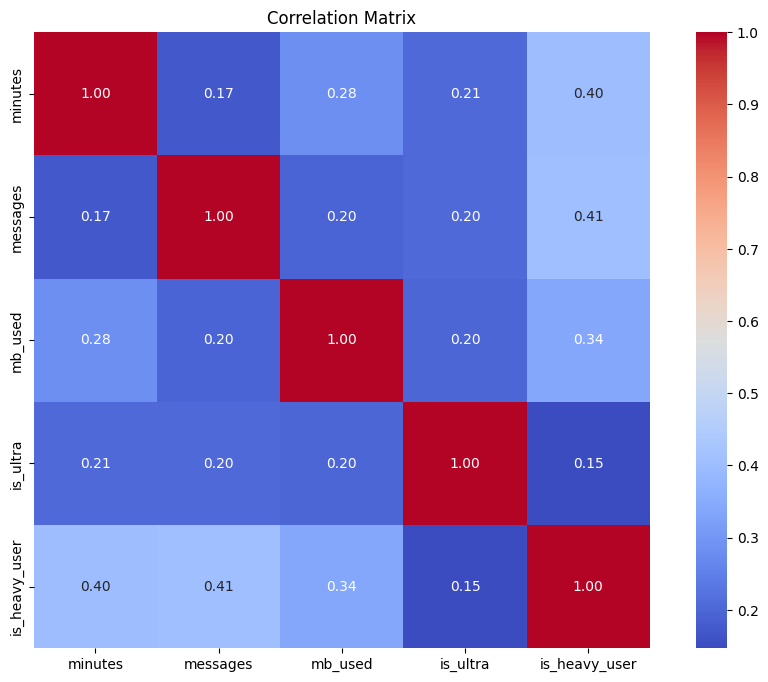

In [16]:
#New Correlation analysis

plt.figure(figsize=(12, 8))
correlation_matrix = df_feat.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('../reports/fig_correlation_matrix_feat.png', bbox_inches='tight')
plt.show()

In [17]:
df_feat.shape
df_feat.to_csv('../data/processed/df_ready.csv', index=False)